In [4]:
print("a")

75 nagano matsumoto
28 nagano sugadaira
34 nagano ueda
128 nagano ina
105 nagano nobeyama
67 matsumoto sugadaira
51 matsumoto ueda
53 matsumoto ina
98 matsumoto nobeyama
16 sugadaira ueda
113 sugadaira ina
77 sugadaira nobeyama
97 ueda ina
76 ueda nobeyama
90 ina nobeyama


nodes of graph g:
[0, 1, 2, 10, 11, 12, 20, 21]

weighted edges of graph g:
(0, 1) weight = 18
(0, 10) weight = 16
(1, 11) weight = 12
(2, 12) weight = 13
(2, 11) weight = 18
(10, 11) weight = 17
(10, 20) weight = 14
(10, 21) weight = 11
(11, 12) weight = 20
(20, 21) weight = 15



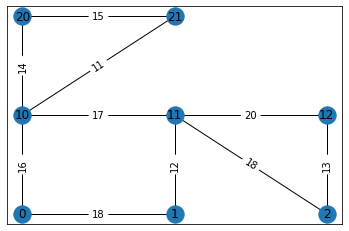

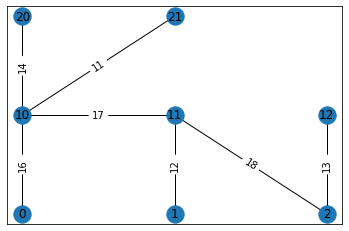

dictionary that maps pairs of nodes to distances between them:
{0: {0: 0, 10: 16, 1: 18, 21: 27, 20: 30, 11: 30, 2: 48, 12: 50}, 1: {1: 0, 11: 12, 0: 18, 10: 29, 2: 30, 12: 32, 21: 40, 20: 43}, 2: {2: 0, 12: 13, 11: 18, 1: 30, 10: 35, 21: 46, 0: 48, 20: 49}, 10: {10: 0, 21: 11, 20: 14, 0: 16, 11: 17, 1: 29, 2: 35, 12: 37}, 11: {11: 0, 1: 12, 10: 17, 2: 18, 12: 20, 21: 28, 0: 30, 20: 31}, 12: {12: 0, 2: 13, 11: 20, 1: 32, 10: 37, 21: 48, 0: 50, 20: 51}, 20: {20: 0, 10: 14, 21: 15, 0: 30, 11: 31, 1: 43, 2: 49, 12: 51}, 21: {21: 0, 10: 11, 20: 15, 0: 27, 11: 28, 1: 40, 2: 46, 12: 48}}

distance between  0 and 11 = 30
distance between 12 and 20 = 51


In [1]:
# coding: utf-8

# モジュール networkx をインポート、以後 nx という名前で使う。
import networkx as nx

# モジュール matplotlib.pyplot をインポート、以後 plt という名前で使う。
# グラフの描画のため。
import matplotlib.pyplot as plt

######################################################################
# グラフを生成する
######################################################################

# gnl は頂点のリスト。
# gel は辺のリスト。
# 辺のリストは、頂点2個と辺重みが並んだタプルのリストとする。
gnl = [0, 1, 2, 10, 11, 12, 20, 21]
gel = [(0,    1,  18),
       (0,   10,  16),
       (1,   11,  12),
       (10,  11,  17),
       (11,  12,  20),
       (2,   12,  13),
       (11,   2,  18),
       (10,  20,  14),
       (20,  21,  15),
       (10,  21,  11)]

# グラフのインスタンスを生成する。
# この時点では、頂点も辺ももたない。
g = nx.Graph()

# グラフ g に、頂点と辺を与える。
# 頂点のリストと辺のリストからそれぞれ与える。
# 辺については、辺重みもあわせて与える。
g.add_nodes_from(gnl)
g.add_weighted_edges_from(gel, 'weight')

######################################################################
# 生成したグラフに関する情報を表示する
######################################################################

# グラフ g の頂点を表示する。
print('nodes of graph g:')
print(g.nodes())
print('')

# グラフ g の辺を表示する。
# 辺重みもあわせて表示する。
print('weighted edges of graph g:')
for e in g.edges():
    print(e, 'weight =', g[e[0]][e[1]]['weight'])
print('')

######################################################################
# グラフを描画する
######################################################################

# 描画の際の、各頂点の座標を、ディクショナリとして与える。
gpos = {0: (0, 0), 1: (1, 0), 2: (2, 0),
        10: (0, 1), 11: (1, 1), 12: (2, 1),
        20: (0, 2), 21: (1, 2), 22: (2, 2)}

# グラフ g を描画する。
nx.draw_networkx(g, gpos, with_labels=True)

# グラフ g の辺重みを描画する。
gweight = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, gpos, edge_labels=gweight)

plt.show()

######################################################################
# 辺重み付きグラフに対する、様々な最適化問題を解くアルゴリズム
######################################################################

######################################################################
# 最小全域木
######################################################################

# グラフ g の最小全域木を生成する。
# 求めた結果をグラフ h とする。
# グラフ g の辺重みは、グラフ h に引き継がれる。
h = nx.minimum_spanning_tree(g, weight='weight')

# グラフ h （すなわち、グラフ g の最小全域木）を描画する。
# 各頂点の座標は、グラフ g のものを流用する。
nx.draw_networkx(h, gpos, with_labels=True)

# グラフ h の辺重みを描画する。
hweight = nx.get_edge_attributes(h, 'weight')
nx.draw_networkx_edge_labels(h, gpos, edge_labels=hweight)

plt.show()

######################################################################
# 最短路
######################################################################

# グラフ g の辺重みを距離とみなし、
# すべての頂点の組について、それぞれ最短距離を求める。
# 結果は、ディクショナリをキーとするディクショナリとして与えられる。
# 注意：最短路が、必ずしも最小全域木の辺を通るわけではない。
print('dictionary that maps pairs of nodes to distances between them:')
saitankyori_dic = dict(nx.shortest_path_length(g, weight='weight'))
print(saitankyori_dic)
print('')

# 次の例のように、ディクショナリにキーを 2 つ与えることにより、
# 頂点の組についての最短距離を得られる。
print('distance between  0 and 11 =', saitankyori_dic[ 0][11])
print('distance between 12 and 20 =', saitankyori_dic[12][20])


In [18]:
import time
import math 
t = 100
x = time.time()
time.sleep(1)
z = math.floor(time.time() - x)
print(t - z)

99


 999999999999999999 1000000000000000000
1746


In [49]:
from math import pi,sin,cos,atan2
print(sin(2*pi))

-2.4492935982947064e-16


In [25]:
import numpy as np
np.set_printoptions(suppress=True)

a = np.array([[4/5,1/10],
             [1/5,9/10]])
b = np.array([300000,300000])

w,v = np.linalg.eig(a)

for i in range(w.size):
    eigenva = w[i]
    
    eigenve = v.T[i].reshape(-1,1)
    
    print(eigenva)
    print(eigenve)
    
vi = np.linalg.inv(v)

print(np.matmul(vi, np.matmul(a, v)))

0.7000000000000001
[[-0.70710678]
 [ 0.70710678]]
1.0
[[-0.4472136 ]
 [-0.89442719]]
[[-0.94280904  0.47140452]
 [-0.74535599 -0.74535599]]
[[0.7 0. ]
 [0.  1. ]]


In [44]:
import numpy as np
a = np.array([[2/3,1/6],
             [1/3,5/6]])

vec,p = np.linalg.eig(a)
print(vec)
pi = np.linalg.inv(p)

tai = np.matmul(np.matmul(pi,a),p)
print(tai)

[0.5 1. ]
[[0.5 0. ]
 [0.  1. ]]


In [38]:
import numpy as np

s = np.array([[2/3,1/6],
             [1/3,5/6]])

p = np.array([1,1])

for i in range(1000):
    p = np.matmul(s,p)

print(p)

[0.66666667 1.33333333]


0.6669921875

In [9]:
ord("A")

65

In [47]:
n,m = map(int,input().split())
lis = [[] for _ in range(n)]

 3
 1 5 2
6
[[8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 7, 7, 7, 7, 7, 7, 7, 7], [8, 7, 7, 7, 7, 3, 2, 2, 2], [8, 7, 6, 5, 5, 3, 2, 1, 0]]


In [36]:
n = int(input())
t = list(map(int,input().split()))
su = sum(t)





 9
 3 14 15 9 26 5 35 89 79
168


7


In [ ]:
a = 0.34562
b = 12.45631
